In [204]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [205]:
# Import data (Make sure to parse dates. Set the index to the date column.)

link = 'https://raw.githubusercontent.com/alango89/Python/main/Page%20View%20Time%20Series%20Visualizer/fcc-forum-pageviews.csv'
df = pd.read_csv(link, parse_dates=['date'],index_col=0)
df = df.sort_values('value')
df = df.rename(columns={'value': 'Page Views'})
df = df.rename_axis('Date')

In [206]:
# Clean data 
#Clean the data by filtering out days when the page views 
#were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
mask1 = df['Page Views'].quantile(0.025)
mask2 = df['Page Views'].quantile(0.975)

df = df[(df['Page Views'] >= mask1) & (df['Page Views'] <= mask2)]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

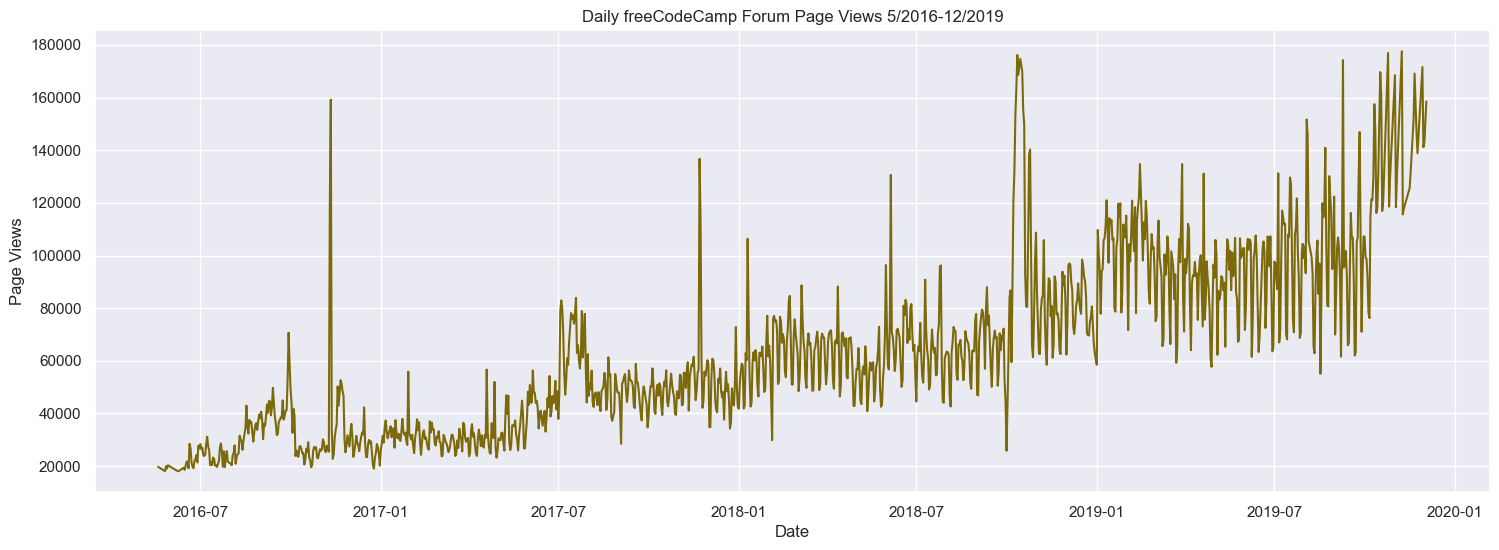

In [237]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
#The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date 
#and the label on the y axis should be Page Views.

def draw_line_plot():
    # Draw line plot
    fig = plt.figure()
    plt.figure(figsize=(18, 6))
    sns.lineplot(data=df, x='Date', y='Page Views').set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    



    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

<Figure size 640x480 with 0 Axes>

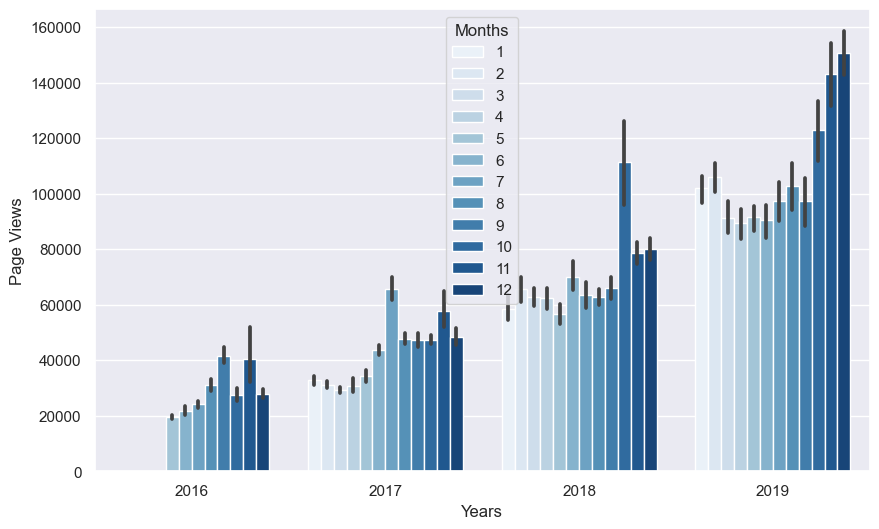

<Figure size 640x480 with 0 Axes>

In [236]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
#It should show average daily page views for each month grouped by year. 
#The legend should show month labels and have a title of Months. On the chart, the label on the x axis 
#should be Years and the label on the y axis should be Average Page Views.

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['Months'] = df.index.month
    df_bar['Years'] = df.index.year
    # Draw bar plot
    fig = plt.figure()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_bar, x = 'Years', y='Page Views', hue='Months', palette='Blues' )
    plt.show()
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

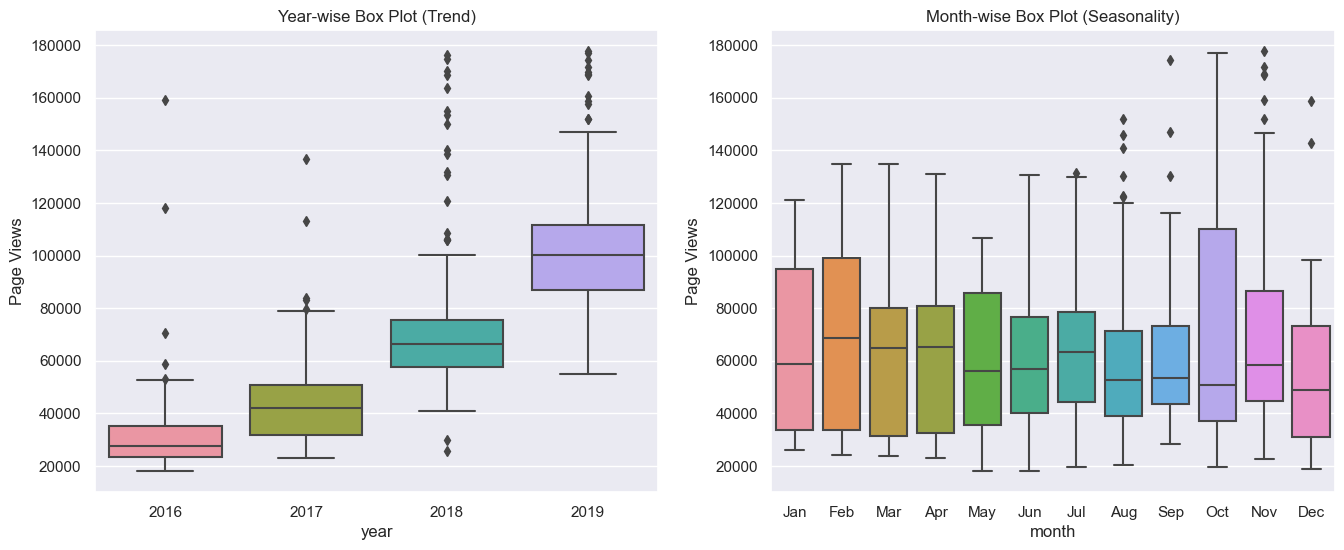

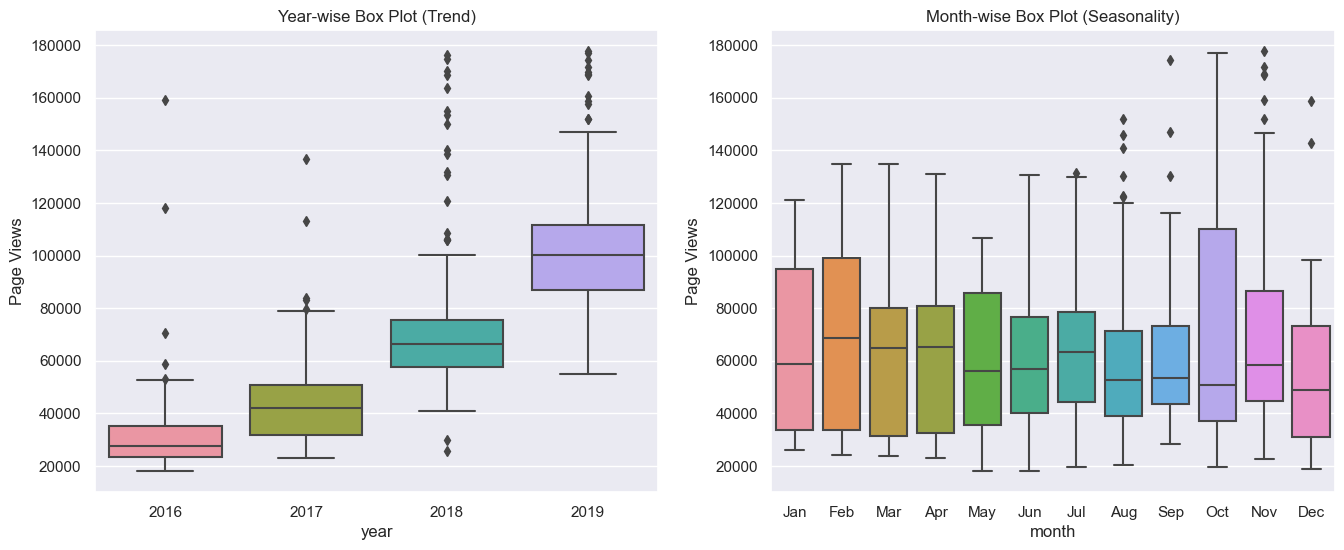

In [239]:

#Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
#These box plots should show how the values are distributed within a given year or month and how it compares over 
#time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should 
#be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are 
#labeled correctly. The boilerplate includes commands to prepare the data.

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.Date]
    df_box['month'] = [d.strftime('%b') for d in df_box.Date]
    df_box['NMonths'] = df.index.month
    df_box = df_box.sort_values(['NMonths'])

    # Draw box plots (using Seaborn)
    fig = plt.figure(figsize=(16,6))

    ax1 = plt.subplot(1,2,1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    sns.boxplot(data=df_box, x='year',y='Page Views')

    ax2 = plt.subplot(1,2,2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    sns.boxplot(data=df_box, x='month',y='Page Views')
    
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()